In [1]:
!pip install kaggle

In [2]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
filename = "/root/.kaggle/kaggle.json"  # NOTE: This is different from the Medium post!
os.makedirs(os.path.dirname(filename), exist_ok=True)
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [4]:
!kaggle competitions download -c freesound-audio-tagging

  0% 0.00/449k [00:00<?, ?B/s]
100% 449k/449k [00:00<00:00, 61.9MB/s]
  0% 0.00/440k [00:00<?, ?B/s]
100% 440k/440k [00:00<00:00, 59.9MB/s]
  0% 0.00/321k [00:00<?, ?B/s]
100% 321k/321k [00:00<00:00, 45.8MB/s]
  0% 0.00/228k [00:00<?, ?B/s]
100% 228k/228k [00:00<00:00, 78.0MB/s]
100% 3.27G/3.27G [00:33<00:00, 120MB/s]
100% 3.27G/3.27G [00:33<00:00, 106MB/s]
100% 3.78G/3.79G [00:50<00:00, 42.9MB/s]
100% 3.79G/3.79G [00:50<00:00, 80.2MB/s]


In [0]:
!unzip ./audio_train.zip
!unzip ./audio_test.zip

In [0]:
import numpy as np
np.random.seed(1001)

import os
import shutil

import IPython
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook

import torch
from torch.utils.data import Dataset, DataLoader
import librosa
import librosa.display

%matplotlib inline
matplotlib.style.use('ggplot')

In [0]:
train = pd.read_csv("./train.csv")

In [34]:
print(train.label.unique())

['Hi-hat' 'Saxophone' 'Trumpet' 'Glockenspiel' 'Cello' 'Knock'
 'Gunshot_or_gunfire' 'Clarinet' 'Computer_keyboard' 'Keys_jangling'
 'Snare_drum' 'Writing' 'Laughter' 'Tearing' 'Fart' 'Oboe' 'Flute' 'Cough'
 'Telephone' 'Bark' 'Chime' 'Bass_drum' 'Bus' 'Squeak' 'Scissors'
 'Harmonica' 'Gong' 'Microwave_oven' 'Burping_or_eructation' 'Double_bass'
 'Shatter' 'Fireworks' 'Tambourine' 'Cowbell' 'Electric_piano' 'Meow'
 'Drawer_open_or_close' 'Applause' 'Acoustic_guitar' 'Violin_or_fiddle'
 'Finger_snapping']


In [43]:
train.head()

,fname,label,manually_verified
0,00044347.wav,Hi-hat,0
1,001ca53d.wav,Saxophone,1
2,002d256b.wav,Trumpet,0
3,0033e230.wav,Glockenspiel,1
4,00353774.wav,Cello,1


(array([0.00415039, 0.00469971, 0.00430298, ..., 0.        , 0.        ,
       0.        ], dtype=float32), 44100)
tensor([0.0042, 0.0047, 0.0043,  ..., 0.0000, 0.0000, 0.0000]) torch.Size([585648])
[0.00415039 0.00469971 0.00430298 ... 0.         0.         0.        ] (585648,)


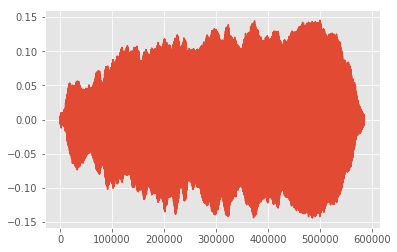

/usr/local/lib/python3.6/dist-packages/librosa/core/spectrum.py:983: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


(1025, 1144)


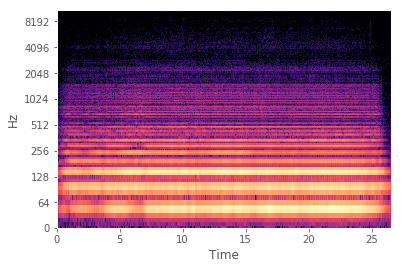

In [42]:
wav_name = train.iloc[5, 0]
#print(wav_name)

wav = os.path.join("./audio_train", wav_name)
data = librosa.core.load(wav, sr=None)
print(data)

ts = torch.from_numpy(data[0])
print(ts, ts.shape)

print(ts.numpy(), ts.numpy().shape)

plt.plot(ts.numpy())
plt.show()

stft = librosa.core.stft(data[0])
librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), 
                         y_axis='log', x_axis='time')
print(stft.shape)

In [41]:
class WavTagDataset(Dataset):
  def __init__(self, csv_file, root_dir):
    self.wav_data = pd.read_csv(csv_file)
    self.root_dir = root_dir
    self.transform = transform
  
  def __len__(self):
    return len(self.wav_data)
  
  def __getitem__(self, idx):
    wav_load = os.path.join(self.root_dir, self.wave_data[idx, 0])
    wav = librosa.core.load(wav, sr=None)

SyntaxError: ignored